### SVR Hyper Parameter Tuning

In [62]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
Boston_P = load_boston()
Boston_P

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [64]:
X = Boston_P.data
X.shape

(506, 13)

In [65]:
y = Boston_P.target
y.shape

(506,)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=76, shuffle=True)

#### Normalizing data

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
X_train = scaler.fit_transform(X_train)

In [71]:
# X_train

In [72]:
X_test = scaler.fit_transform(X_test)

In [73]:
y_train = y_train.reshape(-1,1)

In [74]:
y_train = scaler.fit_transform(y_train)

In [75]:
# y_train

#### Tuning -> in SVR tuning do not use X_train, X_test, etc.. Use X, y directly

In [76]:
from sklearn.svm import SVR

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'kernel': ['rbf', 'linear'], 
              'gamma': [1,0.1,0.01]}

In [79]:
# estimator -> SVR()
# refit ->  an estimator using the best found params on the whole dataset
# verbose -> it refers to how you want to see the calculation on console
grid = GridSearchCV(SVR(), parameters, refit=True, verbose=2, scoring='neg_mean_squared_error')
grid

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [80]:
grid.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=1, kernel=linear; total time=   0.9s
[CV] END .............................gamma=1, kernel=linear; total time=   0.7s
[CV] END .............................gamma=1, kernel=linear; total time=   0.7s
[CV] END .............................gamma=1, kernel=linear; total time=   1.3s
[CV] END .............................gamma=1, kernel=linear; total time=   0.6s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................gamma=0.1,

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [81]:
best_params = grid.best_params_

In [82]:
best_params

{'gamma': 1, 'kernel': 'linear'}

It says that using Linear kernel function, gives less error and a high accuracy model.

### K-Means - Model Tuning

In [83]:
from sklearn.datasets import load_iris

In [84]:
iris = load_iris()

In [85]:
Data_iris = iris.data

In [86]:
from sklearn.cluster import KMeans

In [87]:
K_inertia = []
for i in range(1,10):
    KMNS = KMeans(n_clusters=i, random_state=44) #random_state -> to not change the sorting every time it runs
    KMNS.fit(Data_iris)
    K_inertia.append(KMNS.inertia_)

In [88]:
K_inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25552380952381,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.598185064935066,
 28.298658730158735]

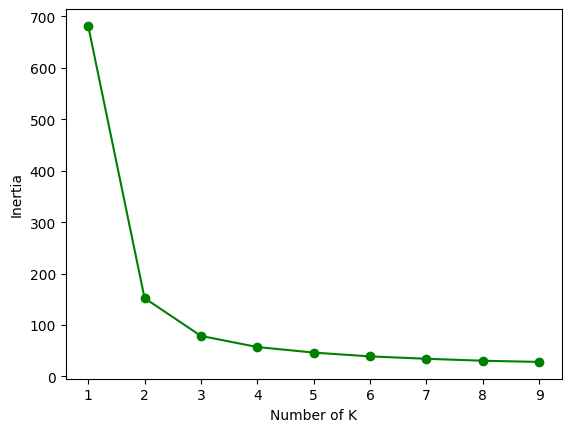

In [89]:
plt.plot(range(1,10), K_inertia, color='green', marker='o')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show()

### k-NN Model Tuning 

In [90]:
X_iris = iris.data

In [91]:
y_iris = iris.target

In [92]:
from sklearn.model_selection import train_test_split

In [98]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, train_size=0.7,
                                                   random_state=2, shuffle=True, stratify=y_iris)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

#### Tuning k

In [100]:
kNN_accuracy_test = []
kNN_accuracy_train = []

In [102]:
for k in range(1,50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski', p=1)
    kNN.fit(X_train_iris,y_train_iris)
    kNN_accuracy_train.append(kNN.score(X_train_iris,y_train_iris))
    kNN_accuracy_test.append(kNN.score(X_test_iris,y_test_iris))

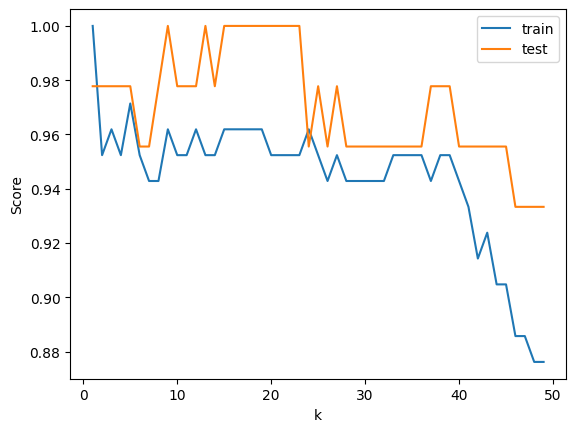

In [103]:
  
plt.plot(np.arange(1,50), kNN_accuracy_train, label = 'train')
plt.plot(np.arange(1,50), kNN_accuracy_test, label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

- We can see that at the begining k=1, we have overfitting -> this is that the training accuracy is high but the test accuracy is low.

- On the other side, with k=50, the training and test acurracies are low, thus this is underfitting.